In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

2024-07-11 20:27:31.743725: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-11 20:27:33.073046: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/nitinspatel/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
print(tf.__version__)

2.16.1


LOAD THE DATASET

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [7]:
def plot_sample(X,y,index):    
    plt.figure(figsize = (15,3))
    plt.imshow(X[index])
    plt.xlabel(classes[int(y[index])], color='blue' ) 
    plt.show()

/tmp/ipykernel_27108/1325365805.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(classes[int(y[index])], color='blue' )


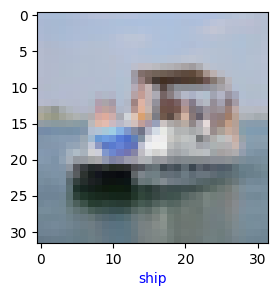

In [8]:
plot_sample(X_train, y_train , 49000)

In [9]:
X_test = X_test / 255
X_train = X_train / 255

simple ANN for image classification

In [10]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

# categorical for one-hot encoded , sparse categorical for just labelled/encoded data
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/home/nitinspatel/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-07-11 20:27:38.534188: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-11 20:27:38.559835: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform

Epoch 1/5


2024-07-11 20:27:41.213210: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


   2/1563 ━━━━━━━━━━━━━━━━━━━━ 2:43 105ms/step - accuracy: 0.1172 - loss: 2.5584 

2024-07-11 20:27:42.486912: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36864000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.3019 - loss: 1.9329
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 66ms/step - accuracy: 0.4237 - loss: 1.6394
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 66ms/step - accuracy: 0.4506 - loss: 1.5539
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.4749 - loss: 1.4872
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.4952 - loss: 1.4294


In [11]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.40      0.70      0.51      1000
           1       0.72      0.39      0.51      1000
           2       0.48      0.16      0.24      1000
           3       0.38      0.23      0.29      1000
           4       0.45      0.38      0.41      1000
           5       0.51      0.22      0.31      1000
           6       0.38      0.79      0.51      1000
           7       0.51      0.58      0.55      1000
           8       0.54      0.66      0.59      1000
           9       0.54      0.56      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.45     10000
weighted avg       0.49      0.47      0.45     10000



CNN TO train images

In [12]:
# need not tell what filters are to apply in CNN by keras
cnn = models.Sequential([
    #cnn 1
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    # cnn 2
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # dense network
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/home/nitinspatel/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.3820 - loss: 1.6993
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6010 - loss: 1.1414
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6557 - loss: 0.9935
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6866 - loss: 0.8951
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7132 - loss: 0.8249
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7406 - loss: 0.7505
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.7529 - loss: 0.7111
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.7719 - loss: 0.6606
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7861 - loss: 0.6202
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7973 - loss: 0.5837


With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [15]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6937 - loss: 0.9372


[0.9504290223121643, 0.694100022315979]

In [16]:
y_test = y_test.reshape(-1,)

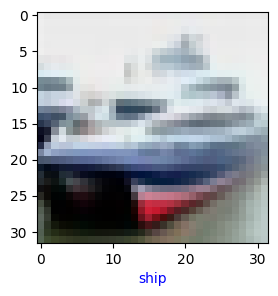

In [18]:
plot_sample(X_test,y_test,1)

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[1.4016514e-04, 3.1926061e-04, 1.6558791e-02, 6.3448489e-01,
        1.7674360e-02, 2.9044476e-01, 1.0594310e-02, 2.4884642e-04,
        2.8932313e-02, 6.0225429e-04],
       [2.8693110e-03, 1.4881440e-01, 8.8673958e-05, 1.0451514e-06,
        1.0534697e-07, 2.0425576e-08, 8.3309644e-09, 7.6449444e-11,
        8.4821332e-01, 1.3086158e-05],
       [4.6006452e-02, 3.3187304e-02, 8.0182245e-03, 2.1123848e-04,
        2.9408556e-04, 2.7739566e-06, 1.4448489e-05, 3.1348236e-04,
        9.0587807e-01, 6.0739177e-03],
       [9.7476226e-01, 1.9282032e-03, 1.0569946e-02, 7.0720474e-05,
        1.3202971e-05, 1.6547029e-06, 3.7497355e-06, 2.0877906e-06,
        1.2586062e-02, 6.2014748e-05],
       [1.5219570e-05, 3.2042642e-04, 7.7215627e-02, 8.2322927e-03,
        1.6796027e-01, 5.9455144e-03, 7.4029297e-01, 2.2912359e-06,
        1.1627215e-05, 3.7624118e-06]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 6, 6, 9, 6, 3, 1]

In [23]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [28]:
classes[y_classes[6]]

'truck'

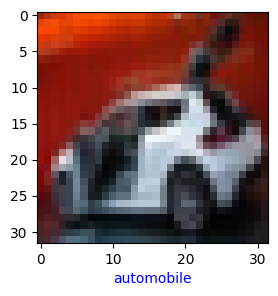

In [27]:
plot_sample(X_test,y_test,6)

In [29]:
print("classification_report : \n", classification_report(y_test,y_classes))

classification_report : 
               precision    recall  f1-score   support

           0       0.71      0.71      0.71      1000
           1       0.80      0.79      0.79      1000
           2       0.54      0.69      0.61      1000
           3       0.55      0.47      0.51      1000
           4       0.73      0.59      0.65      1000
           5       0.68      0.53      0.60      1000
           6       0.80      0.74      0.77      1000
           7       0.67      0.81      0.73      1000
           8       0.70      0.86      0.78      1000
           9       0.81      0.74      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

